#### Building a Neural Network from Scratch
    https://jonathanweisberg.org/post/A%20Neural%20Network%20from%20Scratch%20-%20Part%201/

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
dataset = fetch_openml('mnist_784')
X, y = dataset["data"], dataset["target"]

In [3]:
X = X / 255 #normalize data (0-1)

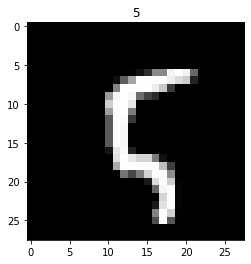

In [4]:
i = 100
img_1 = X[i,:].reshape(28,28)
plt.title(y[i])
plt.imshow(img_1, cmap="gray")

In [5]:
y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new

In [6]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

In [7]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

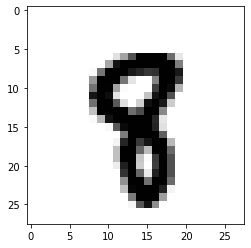

[0.]


In [8]:
i = 3
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.show()
print(y_train[:,i])

In [9]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [10]:
epsilon = 1e-5  
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat + epsilon),Y) ) + np.sum( np.multiply(np.log(1-Y_hat+epsilon),(1-Y)) ) )

    return L

In [11]:
learning_rate = 1

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.6780211644256914
Epoch 100 cost:  7.076902320959307e-06
Epoch 200 cost:  6.788042310395345e-06
Epoch 300 cost:  6.509536669410533e-06
Epoch 400 cost:  6.240823541302168e-06
Epoch 500 cost:  5.981381523350092e-06
Epoch 600 cost:  5.730726063487388e-06
Epoch 700 cost:  5.488406237169835e-06
Epoch 800 cost:  5.254001858305007e-06
Epoch 900 cost:  5.027120884411438e-06
Epoch 1000 cost:  4.807397081508456e-06
Epoch 1100 cost:  4.594487918813517e-06
Epoch 1200 cost:  4.388072667200991e-06
Epoch 1300 cost:  4.187850678699888e-06
Epoch 1400 cost:  3.993539827179672e-06
Epoch 1500 cost:  3.8048750928081207e-06
Epoch 1600 cost:  3.6216072750061164e-06
Epoch 1700 cost:  3.4435018204477878e-06
Epoch 1800 cost:  3.27033775424194e-06
Epoch 1900 cost:  3.10190670381746e-06
Final cost: 2.9396291168853666e-06


In [12]:
y_test[0,100] = 1.0

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))


[[9999    1]
 [   0    0]]


In [23]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10000
        True       0.00      0.00      0.00         0

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



## MultiClass NN

In [2]:
dataset = fetch_openml('mnist_784')
X, y = dataset["data"], dataset["target"]
X = X / 255 #normalize data (0-1)

In [3]:
digits = 10
examples = y.shape[0]
y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [5]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]


(10, 70000)


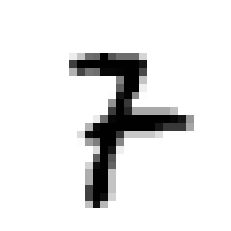

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [27]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [28]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [29]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)


Epoch 0 cost:  8.48002206875187
Epoch 100 cost:  0.7500301161447591
Epoch 200 cost:  0.5633785548709389
Epoch 300 cost:  0.4845327384609507
Epoch 400 cost:  0.4377853372809969
Epoch 500 cost:  0.4053686915574863
Epoch 600 cost:  0.38090989637753625
Epoch 700 cost:  0.361434651008818
Epoch 800 cost:  0.34532382107373133
Epoch 900 cost:  0.33160086477592016
Epoch 1000 cost:  0.31963798619215505
Epoch 1100 cost:  0.3090250183413392
Epoch 1200 cost:  0.29948757049987074
Epoch 1300 cost:  0.29083284018592154
Epoch 1400 cost:  0.28291872328707496
Epoch 1500 cost:  0.27563529760895294
Epoch 1600 cost:  0.2688935198343697
Epoch 1700 cost:  0.2626203949461898
Epoch 1800 cost:  0.2567566844735709
Epoch 1900 cost:  0.25125411424874494
Final cost: 0.24612281485948195


In [30]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 946    0   13    2    2    8   12    3    9    3]
 [   0 1110    3    2    2    1    3    9    4    4]
 [   3    4  927   22    6    5    7   27   12    2]
 [   1    3   17  910    3   31    1   16   18   14]
 [   1    1   14    1  904   11   14    7    9   44]
 [  12    2   10   27    3  786   13    2   10    2]
 [  10    5   11    5   13   16  899    1   12    1]
 [   5    1   13   15    4    7    2  933    6   24]
 [   2    9   21   21    5   24    7    7  879    8]
 [   0    0    3    5   40    3    0   23   15  907]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       998
           1       0.98      0.98      0.98      1138
           2       0.90      0.91      0.91      1015
           3       0.90      0.90      0.90      1014
           4       0.92      0.90      0.91      1006
           5       0.88      0.91      0.89       867
           6       0.94      0.92      0.93       973
           7       0.91      0.92   